# Exploratory Data Analysis - Adult Income Dataset 

In [2]:
# Data exploration libraries
import pandas as pd
import numpy as np 
import warnings
from scipy.stats import randint as sp_randint

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns 

# Sklearn package import
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Misc libraries
import pickle
import json
warnings.filterwarnings("ignore")



In [3]:
# load Training data 

header_list=['age','workclass','fnlwgt','education','education-num','marital-status',
             'occupation','relationship','race','sex',
             'capital-gain','capital-loss','hours-per-week','native-country','income_class']
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
            names=header_list,index_col=False)

data['income_class']=data['income_class'].astype('str')

data['target']=np.where(data['income_class']==data.income_class[1] , 0,1)


## ` Income <= 50k has been labelled as 0`
## ` Income > 50k has been labelled as 1`<br>

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [5]:
# Data type and size

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income_class      32561 non-null object
target            32561 non-null int32
dtypes: int32(1), int64(6), object(9)
memory usage: 3.9+ MB


<br>

#### There are 32561 entries/rows for each 16 columns in the train data, There is also test dataset available which has 
#### 16281 entries which we will load while we start doing the analysis. Lets keep it unseen for now.
#### The Target column contains the binary class of people above or below $50k.
#### Our analysis is based on evaluating given other parameters what is the Income class for the person. <br><br><br>

In [6]:
from IPython.display import display_html

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
  

column=[ 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'native-country',
       'income_class', 'marital-status','target']
  
df1=pd.DataFrame({'Occupation':data.occupation.unique()})

df2=pd.DataFrame({'Workclass':data.workclass.unique()})

education_df=pd.DataFrame({'Education_Label':data.education.unique(), 'Education_Number':data['education-num'].unique()})

df4=pd.DataFrame({'Relationship':data.relationship.unique()})

df5=pd.DataFrame({'Race':data.race.unique()})

df6=pd.DataFrame({'Marital-Status':data['marital-status'].unique()})

df7=pd.DataFrame({'Sex':data.sex.unique()})

df8=pd.DataFrame({'Income_Class':data.income_class.unique()})


print('The categories for each feature are as follows :  ')
display_side_by_side(df1,df2,education_df.sort_values(by='Education_Number'), df4,df5, df6,df7,df8)


The categories for each feature are as follows :  


,Occupation
0,Adm-clerical
1,Exec-managerial
2,Handlers-cleaners
3,Prof-specialty
4,Other-service
5,Sales
6,Craft-repair
7,Transport-moving
8,Farming-fishing
9,Machine-op-inspct


In [7]:
# checking the education related information 

print(data.education.unique())
print(data['education-num'].unique())

education_df=pd.DataFrame({'Education_Label':data.education.unique(), 'Education_Number':data['education-num'].unique()})
print('\n The Numeric values assigned to each education level : ')
education_df.sort_values(by='Education_Number')

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

 The Numeric values assigned to each education level : 


,Education_Label,Education_Number
14,Preschool,1
13,1st-4th,2
11,5th-6th,3
8,7th-8th,4
4,9th,5
12,10th,6
2,11th,7
15,12th,8
1,HS-grad,9
5,Some-college,10


In [8]:
##### I notice that each education level is assigned a corresponsing numeric value which is increasing order of level of 
##### education attained, For example the Pre school is considered as basic level of education with numeric value 1
##### and Doctorate being highest level of educaiton attained is given number 16

### Check how much data we have for each category in the dataset  

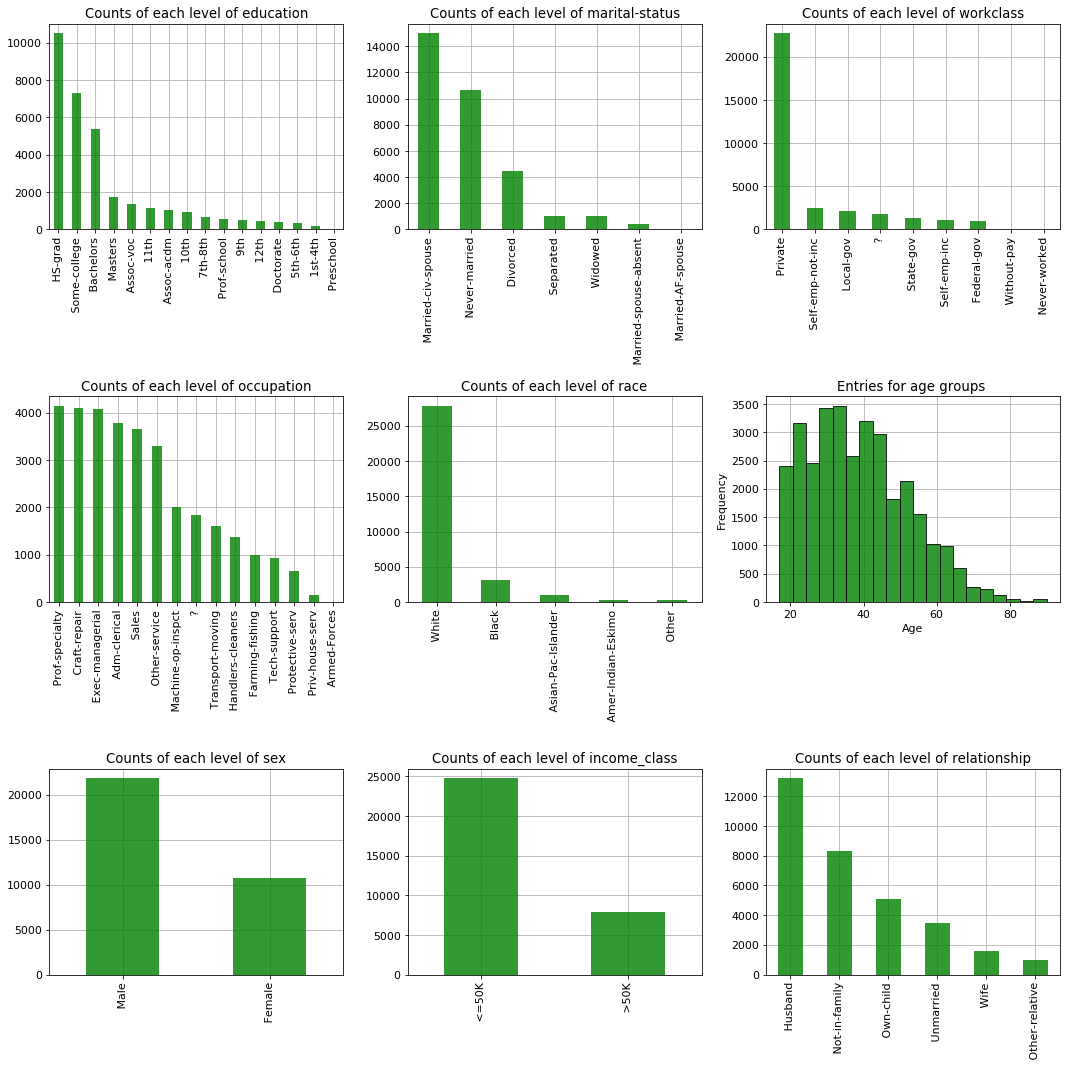

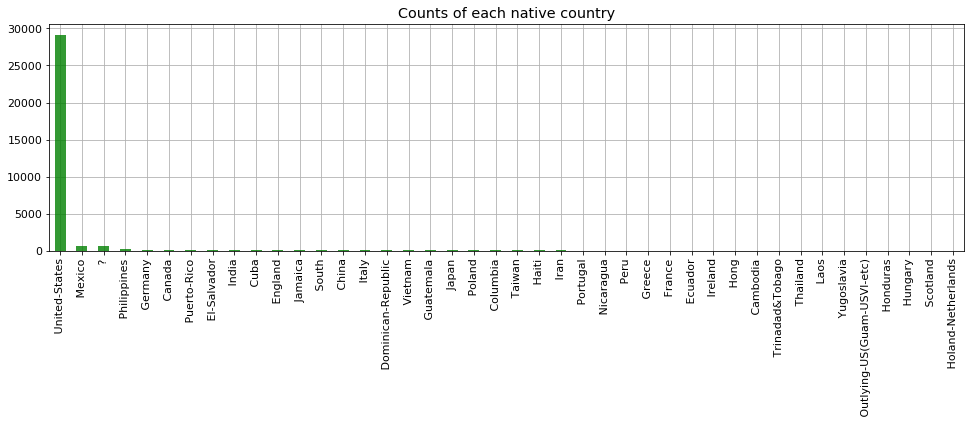

In [8]:
# Visualization of the available data 

fig = plt.figure(figsize=(15, 15))
plt.rc('font', size=11)
plt.rc('axes', axisbelow=True)

list_1=['education','marital-status','workclass','occupation','race','age','sex','income_class','relationship']

for i in list_1:  
    
    if i=='age':
        sub1 = plt.subplot(3, 3, list_1.index(i)+1)
        data['age'].plot(kind='hist', bins=20,edgecolor='black',color='green',alpha=0.8)
        plt.title('Entries for age groups ')
        plt.xlabel('Age')
        plt.tight_layout()
        plt.grid()
    else :    
        sub1 = plt.subplot(3, 3, list_1.index(i)+1)
        data[i].value_counts().plot(kind='bar',color='green',alpha=0.8)
        plt.title('Counts of each level of '+ i)
        plt.grid()
plt.savefig('Data_available_1.png', dpi=600, bbox_inches='tight')
plt.tight_layout()

plt.figure(figsize=(40, 13))
sub1 = plt.subplot(3, 3, 8)
plt.rc('font', size=12)
data['native-country'].value_counts().plot(kind='bar',alpha=0.8, color='green')
plt.title('Counts of each native country')
plt.grid()
plt.tight_layout()
plt.savefig('Data_available.png', dpi=600, bbox_inches='tight')
plt.show()



# Figure A (above)

In [13]:
##### The target variable contains around 24720 entries for the category of people earning <=$50k and around 
##### 7841 entries of people earning more than $50k. This is important observation indicating that our datset is biased
##### towards people earning less than $50k.

### How many people are above 50k range in each category 

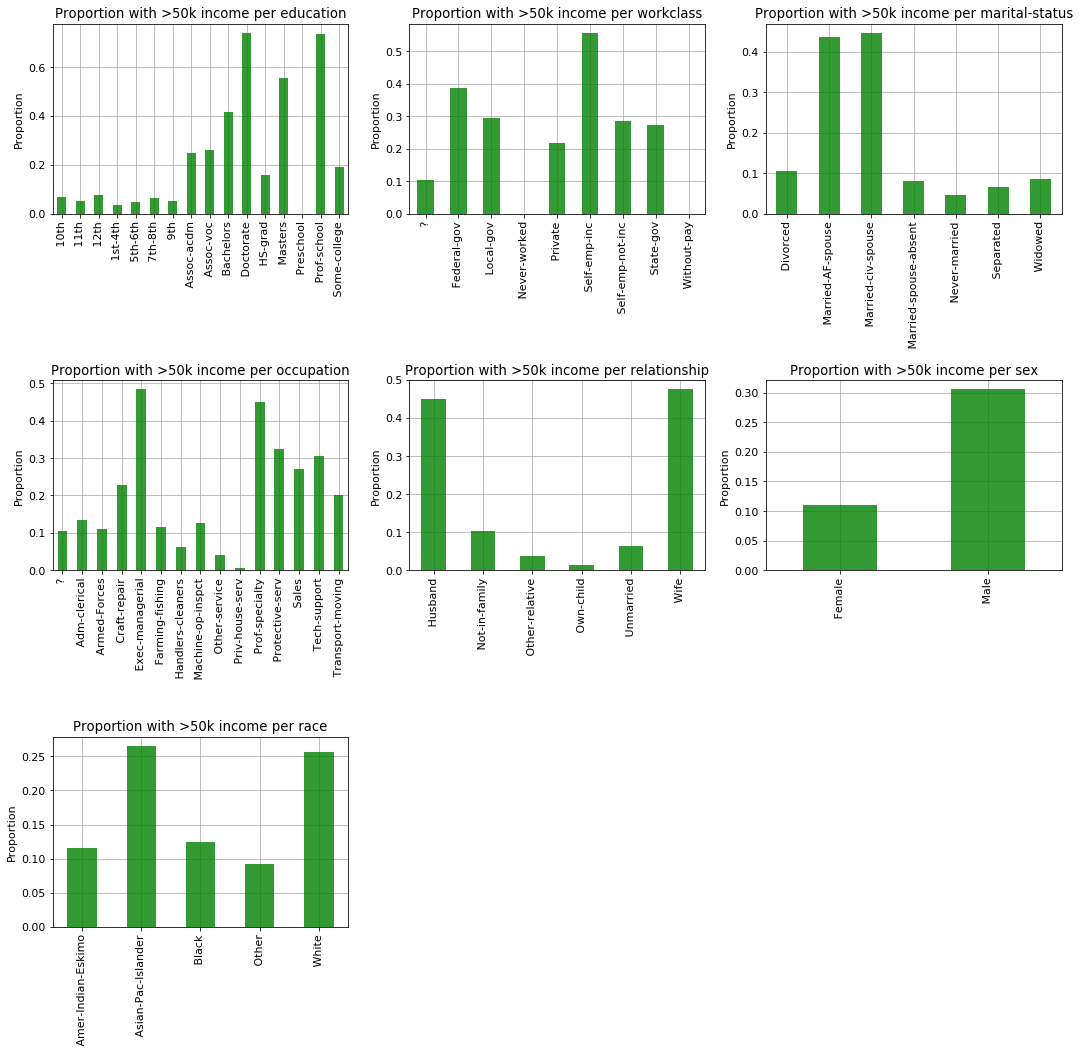

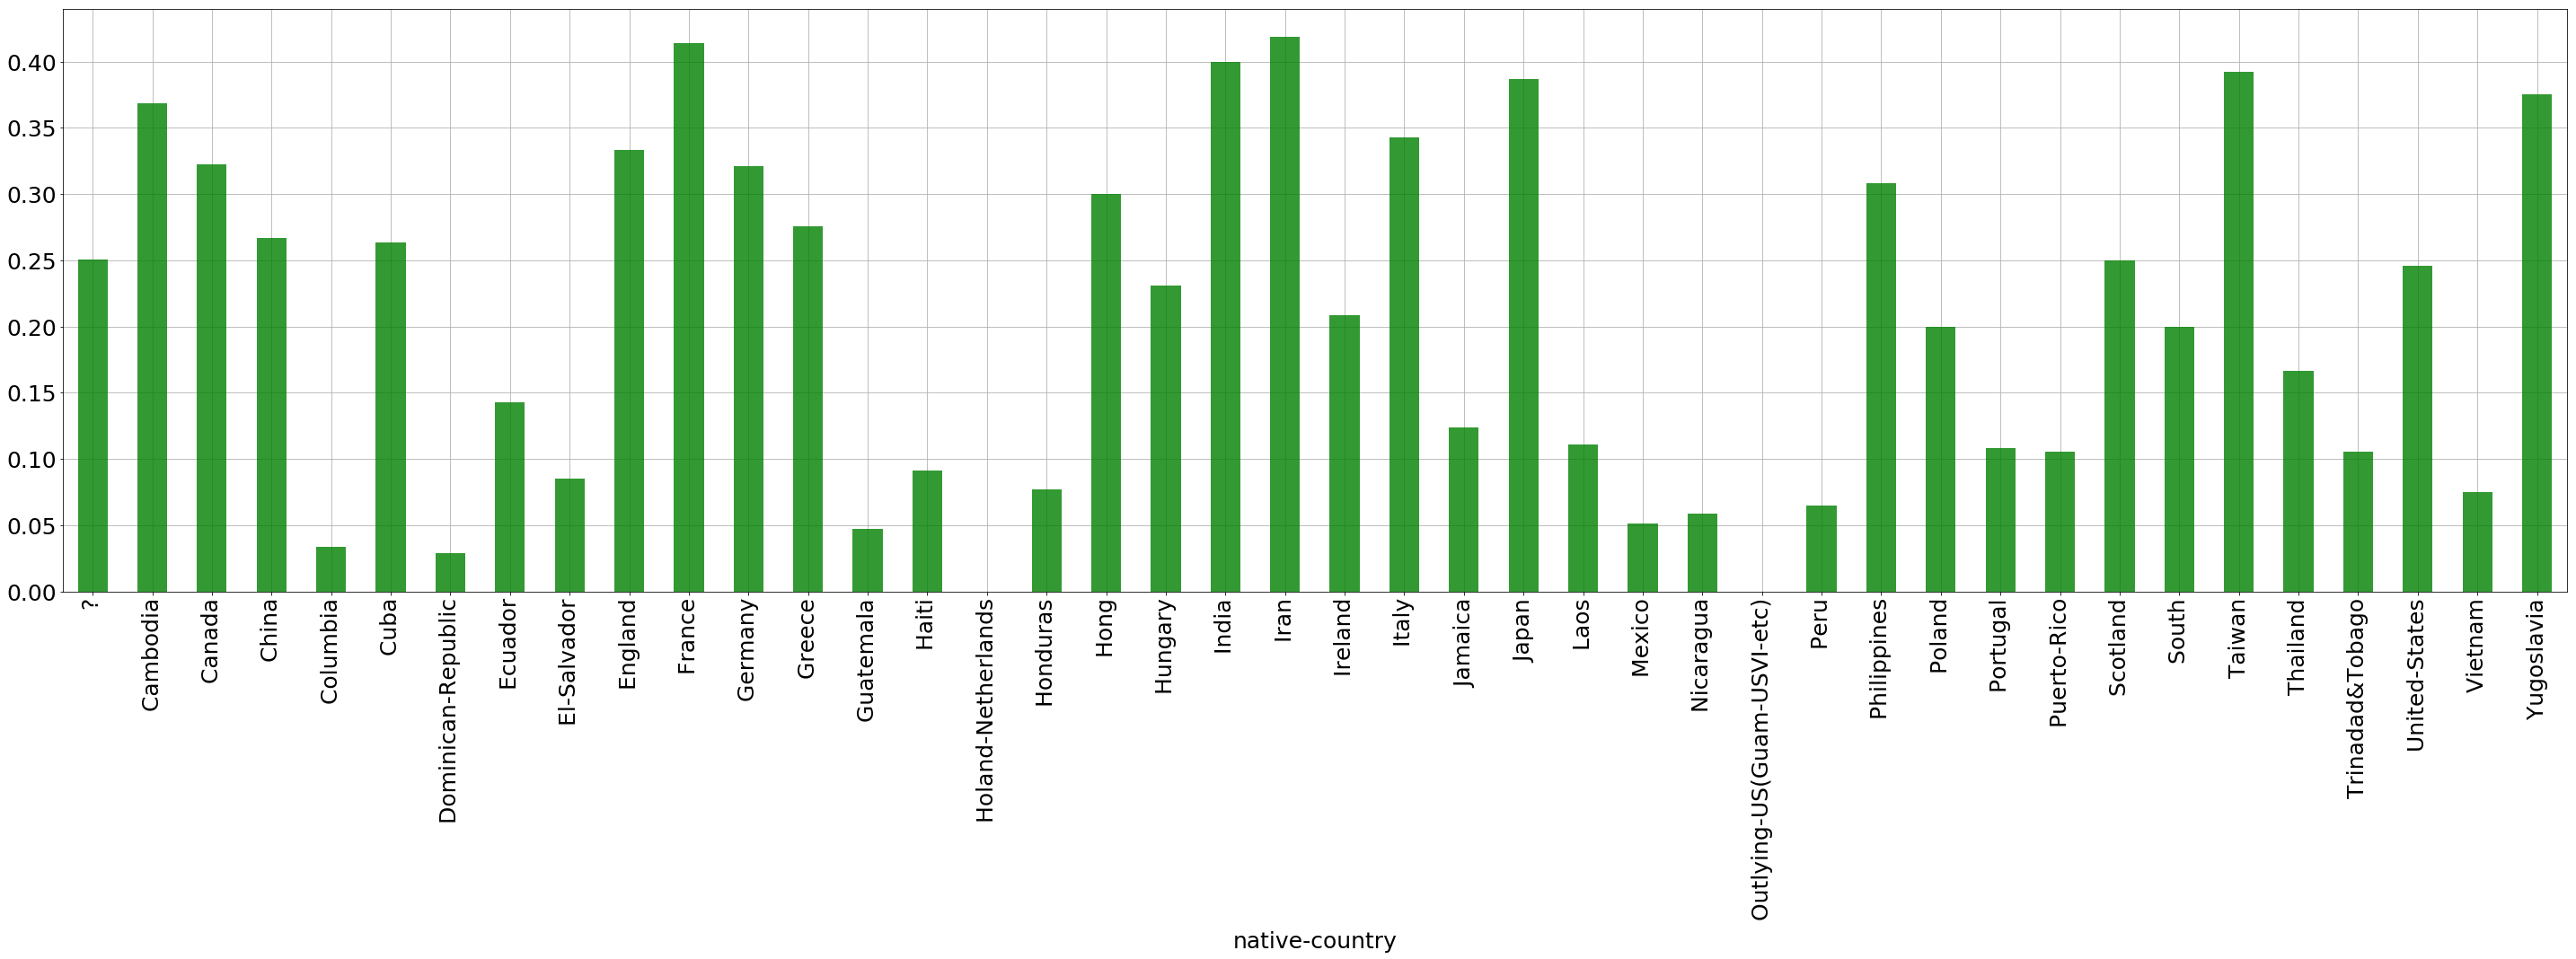

In [14]:
categories= ['education', 'workclass', 'marital-status', 'occupation', 'relationship','sex','race']

fig = plt.figure(figsize=(15, 15))
plt.rc('font', size=11)

for cat in categories:
    sub1 = plt.subplot(3, 3, categories.index(cat)+1)    
    data.groupby(cat).mean()['target'].plot(kind='bar',color='green',alpha=0.8)
    plt.rc('axes', axisbelow=True)
    plt.grid()
    plt.tight_layout()
    plt.xlabel('')
    plt.ylabel('Proportion')
    plt.title('Proportion with >50k income per '+ cat)
plt.savefig('Analysis_Income_prediction_1.png', dpi=600, bbox_inches='tight')   
    
plt.rc('font', size=12)
plt.figure(figsize=(40, 15))
plt.rc('font', size=25)
data.groupby('native-country').mean()['target'].plot(kind='bar',color='green',alpha=0.8)
plt.rc('font', size=12)
plt.grid()
plt.tight_layout()
plt.savefig('Analysis_Income_prediction.png', dpi=600, bbox_inches='tight')
plt.show()


# Figure B (above)

In [15]:
# Education 

##### The wealthy people are generally highly educated. Professors, Doctorate and or masters education 
##### level people earn well
##### But i notice some people with less education also earning >50k, lets investigate 
##### what is the occupation for by which these people earn >50k at such young age 

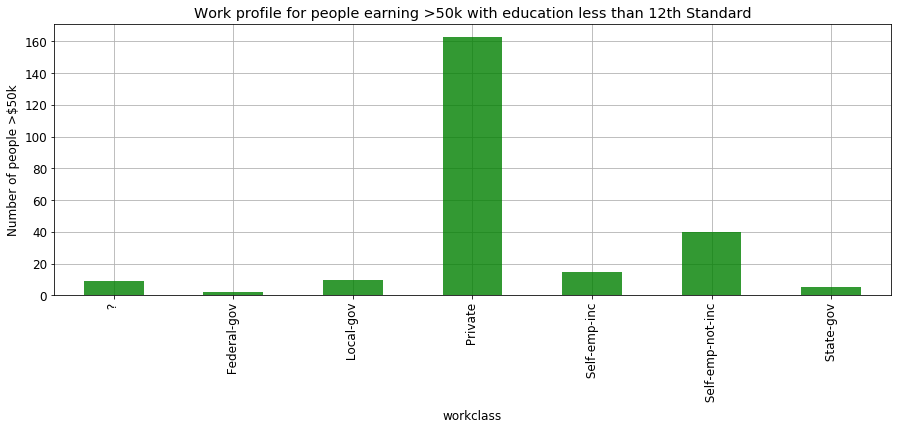

In [16]:
fig = plt.figure(figsize=(15, 5))

data[np.logical_and(data['education-num']<=8,
                    data['target']==1)].groupby('workclass').count()['age'].plot(kind='bar',
                                                                                 color='green',alpha=0.8)
plt.title('Work profile for people earning >50k with education less than 12th Standard')
plt.ylabel('Number of people >$50k')
plt.grid()
plt.savefig('Analysis_Income_prediction_work_profile.png', dpi=600, bbox_inches='tight')


In [18]:
##### Most of the people earning >50k with education level less than 12th standard work in Private jobs 

### Analysis per category now  from Figure B(above)

In [19]:
# Work class

##### The Self employed people have a higher proportion of being rich (>50k $) followed by people working in Federal jobs

In [20]:
# Marital Status 

##### The Married couple from Armed forces and Civilian spouse are in high income category but the dataset 
##### containes very few entries for Armed force category hence we wont consider them as much of a valid observation 

In [153]:
# Occupation 

##### The Executive and Managerial roles are the most paid ones, followed by  Professors and Protective services 
##### Some of the job categories such as Clerical jobs, farming fishing and Cleaners and handlers are not paid much

In [154]:
# Relation ship 

##### Its worth noticing that less proportion of Husbands earn >50k compared to Wives. 
##### I notice that the data for wives is just ~1400  entries and for the husbands is ~ 12500 
##### because of which the proportion is a little misleading 

In [23]:
# Gender

##### The proportion of males with high income is more than the females 

In [24]:
# Native Country 

##### As we saw above the data for United states natives is overwhelmingly higher than other countries. 
##### The proportion of people who got wealthy (>$50k) from different natives is very high for France, Taiwan, Iran. 
##### Again its worth noting that the data for each of these countries is too less to make a sane judgement. 

In [ ]:
# Race 
##### We notice that we have too little data for races other than White(Figure A). Even then if we try to compare the proportions of each race 
##### are earning well (>$50k). For the whites ~ 26% people are earning >\$50k while from the available data ~28% Asian Pac Islander 
##### earn greater than \$50k

### Checking Distribution of income among different age groups 

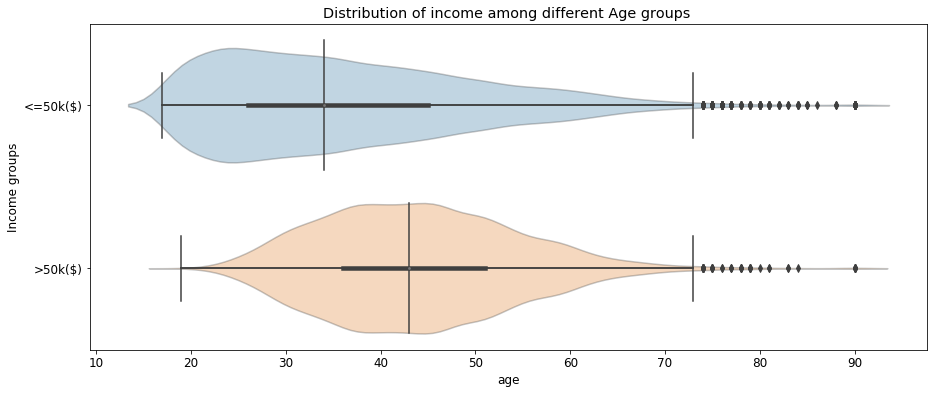

In [25]:
fig = plt.figure(figsize=(15, 6))
plt.legend=['<50k','>=50k']
data['target']=data['target'].astype('category')
ax=sns.boxplot(y='target',x='age',data=data.loc[:,['age','target']],showbox=False)
ax=sns.violinplot(y='target',x='age',data=data.loc[:,['age','target']])

ax.set(yticklabels=['<=50k($)','>50k($)'])
plt.ylabel('Income groups')
plt.setp(ax.collections, alpha=.3)
plt.title('Distribution of income among different Age groups ')
plt.savefig('Analysis_Income_predictionAge.png', dpi=600, bbox_inches='tight')
plt.show()

In [155]:
# Income vs Age 

##### Generally people between the age group of 30-50 are wealthy. The youngsters upto the age of 27 are under 
##### the low income category. This makes sense as this is the age when the students are studying or just getting in 
##### to the employment 

In [156]:
### Checking Distribution of income with the number of hours worked weekly 

<Figure size 2880x1440 with 0 Axes>

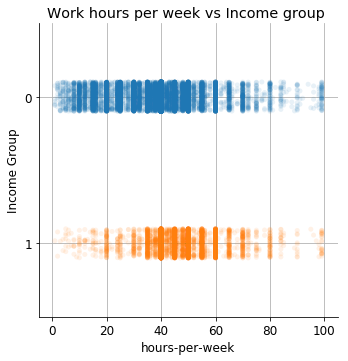

In [27]:
fig = plt.figure(figsize=(40, 20))
ax=sns.catplot(y="target", x="hours-per-week", data=data.loc[:,['hours-per-week','target']], alpha=0.1);
plt.title('Work hours per week vs Income group ')
plt.ylabel('Income Group')
plt.grid()

ax.savefig("Analysis_Income_prediction_workhours.png")


In [28]:
# Hours per week

##### The people in the higher income group work mostly between 35-60 hours a week. 
##### This goes up to 100 as well but there are less of such peopl.

In [29]:
# Race 

##### We notice that we have too little data for races other than White(Figure A). Still i tried to compare compare the 
##### proportions of each race who were wealthy (>50k$). For the whites ~ 26% people are earning >50k while from the available 
##### data ~28% Asian Pac Islander earn greater than $50k

In [30]:
data_gain_loss=data.loc[:,['capital-gain',
                           'capital-loss','target']][np.logical_or(data['capital-gain']!=0,
                                                                                  data['capital-loss']!=0)]
data_gain_loss.head()

,capital-gain,capital-loss,target
0,2174,0,0
8,14084,0,1
9,5178,0,1
23,0,2042,0
32,0,1408,0


# Model fitting data preparation  

In [31]:
# Converting the object variable types to integer for further analysis

In [32]:
header_list=['age','workclass','fnlwgt','education','education-num','marital-status',
             'occupation','relationship','race','sex',
             'capital-gain','capital-loss','hours-per-week','native-country','income_class']
train_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
            names=header_list,index_col=False)

train_data['income_class']=train_data['income_class'].astype('str')

print('Shape of Train dataset is : ', train_data.shape)

Shape of Train dataset is :  (32561, 15)


### Now lets bring in the Test Dataset we had kept hidden till now

In [33]:
test_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
            names=header_list,index_col=False, skiprows=[0])

test_data.head(2)
print('Shape of Test dataset is : ',test_data.shape)

Shape of Test dataset is :  (16281, 15)


In [34]:
test_data.income_class.unique()

array([' <=50K.', ' >50K.'], dtype=object)

### Concatenating the Train and Test data set to bring in correct shape for training Machine Learning model.
### Dont worry we will keep Test data separate while training. <br>

In [35]:
data=pd.concat([train_data,test_data])

In [36]:
# Assigning Male and Females : 1 and 0 Integer Values

data['sex']=data['sex'].map({' Male':1,' Female':0}).astype(int)

In [37]:
# Data set is skewed towards White race hence two categories look ok. 1 for White and 0 for the rest.

data['race']=data['race'].map({' White':1,' Black':0, ' Asian-Pac-Islander':0, ' Amer-Indian-Eskimo':0,
       ' Other':0}).astype(int)

In [38]:
# The income range looks distinct for students upto standard 12th education, then Associates and then people with 
# Bachelors degree or above, Hence I am dividing this category into 3 classes 0 ,1 ,2

data['education']=data['education'].replace([ ' 11th', ' 9th',
       ' 7th-8th', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'],'Lower_Edu')

data['education']=data['education'].replace([' HS-grad', ' Some-college', ' Assoc-acdm', ' Assoc-voc'],'Middle_Edu')


data['education']=data['education'].replace([' Bachelors', ' Masters', ' Doctorate',
        ' Prof-school',],'Higher_Edu')

data['education']=data['education'].map({'Lower_Edu':0,'Middle_Edu':1,'Higher_Edu':2}).astype(int)
    

In [39]:
# All the native United States belong to category 1 and the rest belong to 0

data['native-country']=np.where(data['native-country']==' United-States', 1, 0).astype(int)

In [40]:
# The people working in government belong to category 2, those involved in Private jobs have category 0 and rest of them
# working for themselves are in category 1

data["workclass"] = data["workclass"].replace([' State-gov', ' Federal-gov', 
                                                 ' Local-gov'], 'Gov')

data["workclass"] = data["workclass"].replace([' Self-emp-not-inc', ' Self-emp-inc', 
                                                 ' Without-pay', ' Never-worked'], 'Self')

data["workclass"] = data["workclass"].map({" Private":0, "Self":1, "Gov":2, ' ?':-1}).astype(int)


In [41]:
# Assigning the categories to the occupations. Some occupations are believed to be earning high so i assigned 
# them high pay category. Similarly Middle and Lower Pay categories.

data["occupation"] = data["occupation"].replace([' Exec-managerial', ' Prof-specialty', 
                                                 ' Protective-serv',' Tech-support' ], 'HighPay')

data["occupation"] = data["occupation"].replace([' Craft-repair', ' Sales', 
                                                 ' Transport-moving'], 'MiddlePay')

data["occupation"] = data["occupation"].replace([' Priv-house-serv', ' Farming-fishing', 
                                                 ' Armed-Forces',' Machine-op-inspct',
                                                ' Other-service',' Handlers-cleaners', ' Adm-clerical'], 'LowPay')



data["occupation"] = data["occupation"].map({"LowPay":0, "MiddlePay":1, "HighPay":2, ' ?':-1}).astype(int)

In [42]:
# For the marital status i have assigned three categories. The unmarried people. The people in marriage and 
# another category for those who have separated due to some reason.

data["marital-status"] = data["marital-status"].replace([' Never-married' ], 'Single')

data["marital-status"] = data["marital-status"].replace([' Married-civ-spouse', ' Married-AF-spouse'], 'Couple')

data["marital-status"] = data["marital-status"].replace([' Divorced', ' Married-spouse-absent', 
                                                 ' Separated',
                                                ' Widowed'], 'Separated')

data["marital-status"] = data["marital-status"].map({"Single":0, "Couple":1, "Separated":2}).astype(int)

In [43]:
data.shape

(48842, 15)

In [44]:

data['income_class']=data['income_class'].replace([' <=50K', ' <=50K.'],'<=50K')
data['income_class']=data['income_class'].replace([' >50K',  ' >50K.'],'>50K')

data["income_class"] = data["income_class"].map({'>50K':1, '<=50K':0}).astype(int)

In [45]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,39,2,77516,2,13,0,0,Not-in-family,1,1,2174,0,40,1,0
1,50,1,83311,2,13,1,2,Husband,1,1,0,0,13,1,0
2,38,0,215646,1,9,2,0,Not-in-family,1,1,0,0,40,1,0
3,53,0,234721,0,7,1,0,Husband,0,1,0,0,40,1,0
4,28,0,338409,2,13,1,2,Wife,0,0,0,0,40,0,0


In [46]:
data=data.drop(['fnlwgt', 'relationship','education-num'], axis=1);

In [47]:
data.head()

,age,workclass,education,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,39,2,2,0,0,1,1,2174,0,40,1,0
1,50,1,2,1,2,1,1,0,0,13,1,0
2,38,0,1,2,0,1,1,0,0,40,1,0
3,53,0,0,1,0,0,1,0,0,40,1,0
4,28,0,2,1,2,0,0,0,0,40,0,0


In [48]:
# I will use this train data for the model building

train_dataset=data.iloc[0:32561,]

In [49]:
# I will keep this test dataset aside 

test_dataset=data.iloc[32561:48842,]

In [51]:
X_train=train_dataset.drop(['income_class'],axis=1)
y_train=train_dataset['income_class']

##### Since its a binary classification problem I will use the following models to predict the classes.  <br>
##### 1 -  Random Forest<br>
##### 2 - Logistic regresion<br>
##### 3 - XGBoost<br>
##### 4 - SVM<br>
##### I will fit the models on the train data (32561 Entries) <br>
##### To test the performace I will check the scores on Train and Test data(16281 Entries) <br>
##### After the final model is chosen, I will train the model on the combined train and test data ( 32561 + 16281 = 48842 entries ) <br>
##### and then deploy it on Heroku Cloud Platform <br>

In [54]:
# Creating X_test and y_test for testing scores of models  

X_test=test_dataset.drop(['income_class'],axis=1)
y_test=test_dataset['income_class']

# Random Forest Classifier

In [55]:
model=RandomForestClassifier()

model.fit(X_train,y_train)
print('The train score is : ', "{00:.2f}%".format(round(model.score(X_train, y_train),4)*100))
print('The Test score is : ',"{00:.2f}%".format(round(model.score(X_test, y_test),4)*100))


The train score is :  93.60%
The Test score is :  83.92%


In [56]:
# Applying Randomized search to find the optimum parameters 

param_dist = dict({'max_depth' : np.arange(1,30), 'max_features': np.arange(1,12)})

model_rf=RandomForestClassifier(n_estimators=30)

model_grid=RandomizedSearchCV(model_rf,param_dist,cv=10, n_jobs=-1, n_iter=20, random_state=123)
model_grid.fit(X_train,y_train)

print('The Best Features for Random Forest Are : ',model_grid.best_params_)

The Best Features for Random Forest Are :  {'max_features': 8, 'max_depth': 11}


In [57]:
model_best=RandomForestClassifier(max_features=8, max_depth=11, random_state=123)

model_best.fit(X_train,y_train)
print('The train score is : ', "{00:.2f}%".format(round(model_best.score(X_train, y_train),4)*100))
print('The Test score is : ',"{00:.2f}%".format(round(model_best.score(X_test, y_test),4)*100))

train_acc_rf="{00:.2f}%".format(round(model_best.score(X_train, y_train),4)*100)
test_acc_rf="{00:.2f}%".format(round(model_best.score(X_test, y_test),4)*100)


The train score is :  87.26%
The Test score is :  86.30%


In [58]:
# There is improvement in the Test Accuracy from 84.12% to 86.30% which is good sign that our hyper parameter selection 
# from RandomSearch did add value.

## Confusion Matrix Random Forest

In [93]:
y_test_predicted=model_best.predict(X_test)
cf_rf=confusion_matrix(y_test,y_test_predicted)
cf_rf

array([[11806,   629],
       [ 1447,  2399]], dtype=int64)

# Logistic regression accuracy 

In [59]:
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
print('The train score is : ', "{00:.2f}%".format(round(model_lr.score(X_train, y_train),4)*100))
print('The Test score is : ',"{00:.2f}%".format(round(model_lr.score(X_test, y_test),4)*100))

The train score is :  82.87%
The Test score is :  82.74%


In [61]:
param_dist = dict({'C' : np.logspace(-3,3,7), "penalty":["l1","l2"]})

model_lr=LogisticRegression()

model_grid_lr=GridSearchCV(model_lr,param_dist,cv=10, n_jobs=-1)
model_grid_lr.fit(X_train,y_train)

print('The Best Features for Logistic Regression are : ',model_grid_lr.best_params_)

The Best Features for Logistic Regression are :  {'C': 1.0, 'penalty': 'l1'}


In [62]:
model_lr_best=LogisticRegression(C=10, penalty='l1')
model_lr_best.fit(X_train,y_train)

print('The train score is : ', "{00:.2f}%".format(round(model_lr_best.score(X_train, y_train),4)*100))
print('The Test score is : ',"{00:.2f}%".format(round(model_lr_best.score(X_test, y_test),4)*100))
train_acc_lr="{00:.2f}%".format(round(model_lr_best.score(X_train, y_train),4)*100)
test_acc_lr="{00:.2f}%".format(round(model_lr_best.score(X_test, y_test),4)*100)

The train score is :  82.88%
The Test score is :  82.73%


## Confusion Matrix Logistic Regression 

In [94]:
y_test_predicted_lr=model_lr_best.predict(X_test)
cf_lr=confusion_matrix(y_test,y_test_predicted_lr)
cf_lr

array([[11712,   723],
       [ 2089,  1757]], dtype=int64)

# XG Boost 

In [63]:
model_xgb=XGBClassifier(n_estimators=30,booster='gbtree')
parameters_xgb=dict({'max_depth':np.arange(1,30), 'learning_rate':np.arange(0,1,0.01)})

model_xgb_rs=RandomizedSearchCV(model_xgb,parameters_xgb,cv=5,n_iter=20,n_jobs=-1, random_state=123)

In [64]:
model_xgb_rs.fit(X_train,y_train)

print('The best parameters for XG Boost are : ',model_xgb_rs.best_params_ )

The best parameters for XG Boost are :  {'max_depth': 4, 'learning_rate': 0.85}


In [65]:
model_xgb_best=XGBClassifier(learning_rate=0.85, max_depth=4, n_estimators=30, booster='gbtree', random_state=123)
model_xgb_best.fit(X_train,y_train)
print('The train score is : ', "{00:.2f}%".format(round(model_xgb_best.score(X_train, y_train),4)*100))
print('The Test score is : ',"{00:.2f}%".format(round(model_xgb_best.score(X_test, y_test),4)*100))

train_acc_xgb="{00:.2f}%".format(round(model_xgb_best.score(X_train, y_train),4)*100)
test_acc_xgb="{00:.2f}%".format(round(model_xgb_best.score(X_test, y_test),4)*100)


The train score is :  87.39%
The Test score is :  86.81%


## Confusion Matrix XGB

In [95]:
y_test_predicted_xgb=model_xgb_best.predict(X_test)
cf_xgb=confusion_matrix(y_test,y_test_predicted_xgb)
cf_xgb

array([[11757,   678],
       [ 1469,  2377]], dtype=int64)

# Support Vectore Machines 

In [130]:
model_svm=SVC(C=100)
model_svm.fit(X_train,y_train)

0.9209790854089248

In [138]:
train_acc_svm="{00:.2f}%".format(round(model_svm.score(X_train,y_train),4)*100)
test_acc_svm="{00:.2f}%".format(round(model_svm.score(X_test,y_test),4)*100)

## Confusion Matrix SVM

In [142]:
y_test_prediction_svm=model_svm.predict(X_test)
cf_svm=confusion_matrix(y_test,y_test_prediction_svm)
cf_svm

array([[11298,  1137],
       [ 1633,  2213]], dtype=int64)

In [141]:
# Final Model Accuracies 

In [140]:
pd.DataFrame({'Model':['Random Forest','Logistic Regression','XGBoost', 'SVM'], 
             'Train Accuracy':[train_acc_rf,train_acc_lr,train_acc_xgb, train_acc_svm], 
              'Test Accuracy':[test_acc_rf,test_acc_lr,test_acc_xgb, test_acc_svm]})

,Model,Train Accuracy,Test Accuracy
0,Random Forest,87.26%,86.30%
1,Logistic Regression,82.88%,82.73%
2,XGBoost,87.39%,86.81%
3,SVM,92.10%,82.99%


## Model Evaluation by analysing the Confusion Matrices 

In [126]:
print('Random Forest Confusion Matrix')
cf_rf

Random Forest Confusion Matrix


array([[11806,   629],
       [ 1447,  2399]], dtype=int64)

In [127]:
print('Logistic Regression Confusion Matrix')
cf_lr

Logistic Regression Confusion Matrix


array([[11712,   723],
       [ 2089,  1757]], dtype=int64)

In [128]:
print('XG Boost Confusion Matrix')
cf_xgb

XG Boost Confusion Matrix


array([[11757,   678],
       [ 1469,  2377]], dtype=int64)

In [134]:
print('SVM Confusion Matrix')
cf_svm

SVM Confusion Matrix


array([[11298,  1137],
       [ 1633,  2213]], dtype=int64)

In [120]:
y_test.value_counts()

0    12435
1     3846
Name: income_class, dtype: int64

In [124]:
# Structure of Confusion matrix :

pd.DataFrame({'Predicted <=50k':['Correct <=50k','Incorrect >50k'],
              'Predicted >50k':['Incorrect <=50k','Correct >50k']},index=['True <=50k','True >50k'])

,Predicted <=50k,Predicted >50k
True <=50k,Correct <=50k,Incorrect <=50k
True >50k,Incorrect >50k,Correct >50k


> I notice that all the models are performing well on detection of category 0 which is for "Income < 50k", Random Forest seems to be doing the best though. The More important prediction to us is the "Income>50k" because the training data has much less entries for this category 7841 vs 24720. Comparing the three models I notice that the Random Forest is performing the best to predict the income>50k. This is a motivation to use the Random Forest model going forward.

In [161]:
y_train.value_counts()

0    24720
1     7841
Name: income_class, dtype: int64

### Combining the datasets from Train Test and Validation to train the model on the entire data set

In [69]:
print('The shape of X_train ',X_train.shape)
print('The shape of X_test ',X_test.shape)

The shape of X_train  (32561, 11)
The shape of X_test  (16281, 11)


In [70]:
Entire_X=pd.concat([X_train,X_test])
Entire_y=pd.concat([y_train,y_test])

In [71]:
# Training the Random Forest model on the Entire Dataset

model_best=RandomForestClassifier(max_features=8, max_depth=11, random_state=123)
model_best.fit(Entire_X,Entire_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [72]:
with open('columns.json', 'w') as fh:
    json.dump(Entire_X.columns.tolist(), fh)

In [73]:
with open('dtypes.pickle', 'wb') as fh:
    pickle.dump(Entire_X.dtypes, fh)

In [74]:
from sklearn.externals import joblib
joblib.dump(model_best, 'model.pickle')

['model.pickle']

In [75]:
with open('columns.json', 'r') as fh:
    columns = json.load(fh)

In [76]:
with open('dtypes.pickle', 'rb') as fh:
    dtypes = pickle.load(fh)

In [77]:
pipeline = joblib.load('model.pickle')

In [262]:
new_obs_str = '{"age": 28, "workclass":0 , "education": 2, "marital-status": 1, "occupation": 2, "race": 0, "sex": 1, "capital-gain": 3000,"capital-loss":0,"hours-per-week":50,"native-country":0}'
new_obs_dict = json.loads(new_obs_str)
obs = pd.DataFrame([new_obs_dict], columns=columns)
obs = obs.astype(dtypes)

In [263]:
obs

,age,workclass,education,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,28,0,2,1,2,0,1,3000,0,50,0


In [264]:
model_best.predict(obs)

array([1])

In [265]:
outcome = pipeline.predict_proba(obs)
outcome

array([[0.42197997, 0.57802003]])

In [257]:
X_train.head()

,age,workclass,education,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,2,2,0,0,1,1,2174,0,40,1
1,50,1,2,1,2,1,1,0,0,13,1
2,38,0,1,2,0,1,1,0,0,40,1
3,53,0,0,1,0,0,1,0,0,40,1
4,28,0,2,1,2,0,0,0,0,40,0


# The model is deployed on the Heroku Cloud platform which you can use 
## For any feedback please visit myBlog, GitHub or my email me <br>

BlogPost link : https://birinder1469.github.io/BirinderSingh_Blog/Income_Prediction_App/ <br>
GitHub url : https://github.com/Birinder1469/Income_Prediction <br>
Email : birinder1469@gmail.com<br>